<a href="https://colab.research.google.com/github/primriq/ML-Apex-Univ/blob/main/logistic_regression_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Logistic Regression: Multiclass Digit Classification</h2>

In this notebook, we use **logistic regression** for a **multiclass classification** problem.

We work with the built-in `digits` dataset from scikit-learn, which contains images of handwritten digits (0–9). Our goal is to train a model that can correctly recognize which digit an image represents.

We will:
1. Load and explore the digits dataset
2. Visualize some sample digit images
3. Prepare the data for training
4. Train a logistic regression model
5. Evaluate the model using accuracy, confusion matrix, and other metrics
6. Inspect some predictions


In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# Load the built-in digits dataset
digits = load_digits()

The `digits` object is a scikit-learn **Bunch**, which is similar to a dictionary. It contains:

- `data`: Flattened pixel values for each image
- `images`: 8x8 images for each digit
- `target`: The actual digit (0–9)
- `target_names`: The set of possible labels


In [2]:
print(digits.keys())
print('Data shape:', digits.data.shape)
print('Images shape:', digits.images.shape)
print('Target shape:', digits.target.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data shape: (1797, 64)
Images shape: (1797, 8, 8)
Target shape: (1797,)


Let's look at a few sample digit images from the dataset.

<Figure size 640x480 with 0 Axes>

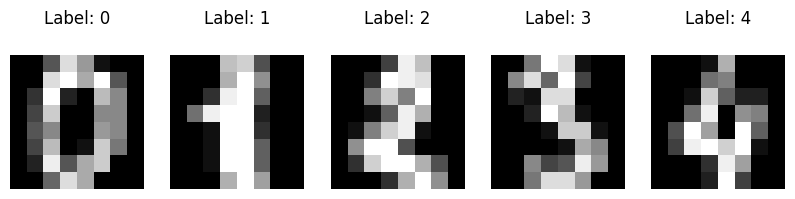

In [3]:
plt.gray()
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.matshow(digits.images[i])
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.show()

Each image is represented as a flattened vector of 64 pixel values (8×8 image). We will use these pixel values as features and the digit (0–9) as the target label.

In [4]:
X = digits.data      # Features: flattened pixel values
y = digits.target    # Target labels: digits 0–9
print('Feature matrix shape:', X.shape)
print('Target vector shape:', y.shape)

Feature matrix shape: (1797, 64)
Target vector shape: (1797,)


We now split the dataset into **training** and **test** sets so that we can evaluate how well the model generalizes to unseen data.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape

((1437, 64), (360, 64))

Next, we create and train a `LogisticRegression` model. Because this is a multiclass problem, scikit-learn handles it using a one-vs-rest or multinomial strategy internally.

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

We can quickly check how well the model performs on the test set using the built-in `score` method, which reports the **accuracy**.

In [7]:
basic_accuracy = model.score(X_test, y_test)
print('Test Accuracy (model.score):', basic_accuracy)

Test Accuracy (model.score): 0.975


To get a more complete view of performance, we compute predictions on the test set and then calculate:

- Confusion matrix
- Accuracy
- Precision (macro & weighted)
- Recall (macro & weighted)
- F1 score (macro & weighted)
- Detailed classification report

For multiclass problems, we often use **macro** or **weighted** averages:
- **macro**: average metric treating all classes equally
- **weighted**: average metric weighted by the number of samples in each class

In [8]:
# Predictions on test data
y_predicted = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_predicted)
print('Confusion Matrix shape:', cm.shape)
cm

Confusion Matrix shape: (10, 10)


array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

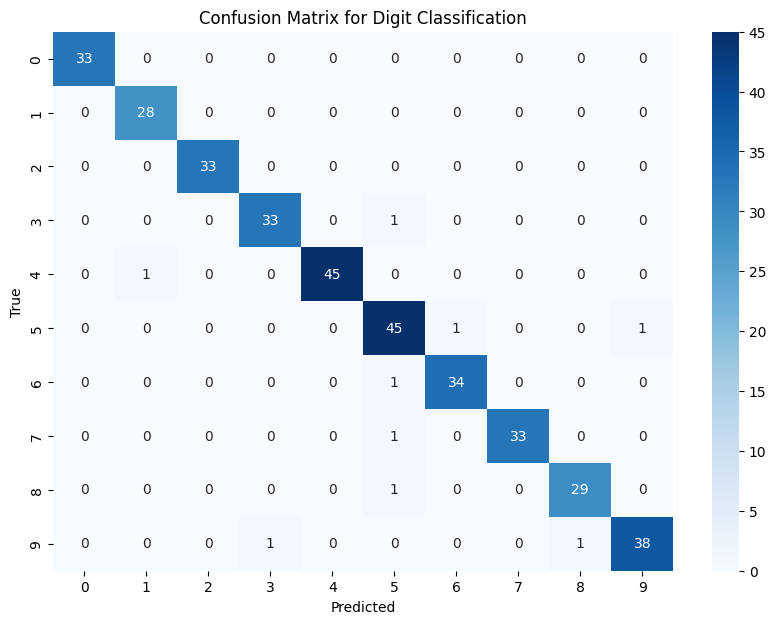

In [9]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Digit Classification')
plt.show()

In [10]:
print('Accuracy:', accuracy_score(y_test, y_predicted))
print('Precision (macro):', precision_score(y_test, y_predicted, average='macro'))
print('Precision (weighted):', precision_score(y_test, y_predicted, average='weighted'))
print('Recall (macro):', recall_score(y_test, y_predicted, average='macro'))
print('Recall (weighted):', recall_score(y_test, y_predicted, average='weighted'))
print('F1 Score (macro):', f1_score(y_test, y_predicted, average='macro'))
print('F1 Score (weighted):', f1_score(y_test, y_predicted, average='weighted'))

print('\nClassification Report:\n')
print(classification_report(y_test, y_predicted))

Accuracy: 0.975
Precision (macro): 0.9766927036066416
Precision (weighted): 0.9754780751086168
Recall (macro): 0.9764979386759329
Recall (weighted): 0.975
F1 Score (macro): 0.9764750546072589
F1 Score (weighted): 0.9751092427666409

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      

Finally, let's look at a few test images along with their true labels and model predictions.

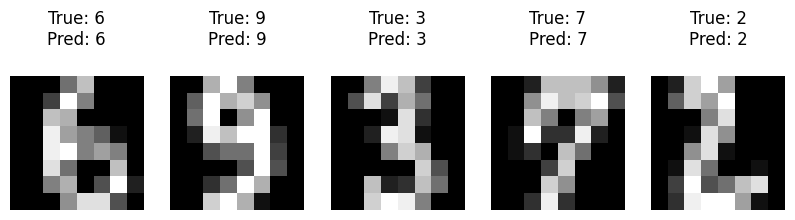

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.matshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'True: {y_test[i]}\nPred: {y_predicted[i]}')
    ax.axis('off')
plt.show()

In this notebook, we used **logistic regression** to classify handwritten digits from the scikit-learn digits dataset. We trained the model, evaluated it using a variety of metrics, and visualized both the confusion matrix and some example predictions.

This workflow can be adapted to other multiclass problems by changing the dataset and features.